In [1]:
import os
import tensorflow.keras
import numpy as np
#from PIL import Image
import tensorflow as tf
from random import randint
import matplotlib.pyplot as plt
from tensorflow.keras import backend as k
#from keras.utils import np_utils
#from keras.optimizers import adam
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
#from sklearn.cross_validation import train_test_split
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Convolution2D,MaxPooling2D

In [ ]:
import pprint
if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; ')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

In [2]:
#process for reproducing same result
import os
import random as rm

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/fchollet/keras/issues/2280#issuecomment-306959926
os.environ['PYTHONHASHSEED']='0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(37)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
rm.seed(1245)

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed
tf.set_random_seed(123)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res
from tensorflow.keras import backend as k

sess=tf.Session(graph=tf.get_default_graph())
k.set_session(sess)

AttributeError: module 'tensorflow' has no attribute 'set_random_seed'

In [3]:
import zipfile
with zipfile.ZipFile("./cat-and-dog.zip","r") as zip_ref:
     zip_ref.extractall("./")

In [4]:
pp='./'
train_path=pp+'cat-and-dog/training_set/'
valid_path=pp+'cat-and-dog/valid_set/'
test_path=pp+'cat-and-dog/test_set/'

The ImageDataGenerator class has two methods flow() and flow_from_directory() to read the images from a big numpy array and folders containing images.

1- here we remove the colors because in dog vs cat is not a key feature makes the array a 2D grayscale make a 2D matrix while if we do not apply grayscale we have a BRG image which generate a tensore

2- The images should be the same size

3- check to have comparable data for each categories, it they are not comparable apply weigth on the loss function

4- Shuffle data for faster learning

5-Normalize data with keras.util.normalize of as max of image pixel is 255 can be divided by 255.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size=224
datagen = ImageDataGenerator(rescale=1./255)
train_batches=datagen.flow_from_directory(
               train_path,
               target_size=(img_size,img_size),
               classes=['dogs','cats'],
               batch_size=10,
               color_mode="grayscale")
valid_batches=datagen.flow_from_directory(
               valid_path,
               target_size=(img_size,img_size),
               classes=['dogs','cats'],
               batch_size=4,
               color_mode="grayscale")
test_batches=datagen.flow_from_directory(
               test_path,
               target_size=(img_size,img_size),
               classes=['dogs','cats'],
               batch_size=4,
               color_mode="grayscale")


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [6]:
train_batches

In [8]:
import numpy as np
# np.size(train_batches)

In [9]:
img,labels=next(train_batches)


In [10]:
np.shape(img)
# img.shape

(10, 224, 224, 1)

In [11]:
#Here the picture is 224,224 and 1 is showing the grayscale. if we use RBG the 1 will convert to 3
np.shape(img[0])


(224, 224, 1)

In [12]:
np.shape(img[0][:,:,0])


(224, 224)

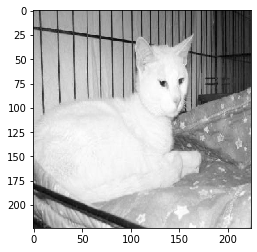

In [13]:
for i in range(0,1):
    image = img[i]
    plt.imshow(image[:,:,0], cmap='gray')
    plt.show()
#.astype('uint8')


# Build CNN

1-convoltion layer input are: number of the features , convolution window and the shape of each image
2- max pool input: is the window of max pooling

3-Here we apply Convolution filter=3*3 and grayscale image=(224,224,1)

In [14]:
# here we can replace img.shape[1:] by (224,224,1)
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=img.shape[1:])) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,(3,3),input_shape=img.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Dense layer is one dimentional data set while convolution is 2 dimentional dataset
model.add(Flatten())
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(2))
model.add(Activation(tf.nn.softmax)) #sigmoid


In [15]:
model

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0

batch size tell you how many data pass at the time

optimizers in keras

http://www.machineintellegence.com/different-types-of-activation-functions-in-keras/

In [17]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["categorical_accuracy"])
#binary_crossentropy
#categorical_crossentropy


By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 shows you nothing (silent)

verbose=1 shows you an animated progress with a progress bar

verbose=2 shows the number of epoch:



steps_per_epoch: Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch. It should typically be equal to the number of unique samples of your dataset divided by the batch size.

In [18]:
valid_batches.samples

2023

In [28]:
model.fit_generator(
                generator=train_batches,
                validation_data=valid_batches,
                steps_per_epoch=150,#train_batches.samples(8005)/train_batches.batch_size(50),
                validation_steps=4,#valid_batches.samples/valid_batches.batch_size,
                verbose=2,
                shuffle=False,
                #callbacks=[checkpointer1], 
                epochs=20)


Epoch 1/20
150/150 - 5s - loss: 0.6121 - categorical_accuracy: 0.6893 - val_loss: 0.6340 - val_categorical_accuracy: 0.5625
Epoch 2/20
150/150 - 5s - loss: 0.5579 - categorical_accuracy: 0.7133 - val_loss: 0.6600 - val_categorical_accuracy: 0.6250
Epoch 3/20
150/150 - 5s - loss: 0.5174 - categorical_accuracy: 0.7540 - val_loss: 0.5513 - val_categorical_accuracy: 0.6875
Epoch 4/20
150/150 - 5s - loss: 0.6433 - categorical_accuracy: 0.6413 - val_loss: 0.6287 - val_categorical_accuracy: 0.6250
Epoch 5/20
150/150 - 5s - loss: 0.6249 - categorical_accuracy: 0.6733 - val_loss: 0.5916 - val_categorical_accuracy: 0.6875
Epoch 6/20
150/150 - 5s - loss: 0.5044 - categorical_accuracy: 0.7565 - val_loss: 0.6457 - val_categorical_accuracy: 0.6250
Epoch 7/20
150/150 - 5s - loss: 0.4504 - categorical_accuracy: 0.7893 - val_loss: 0.5819 - val_categorical_accuracy: 0.6875
Epoch 8/20
150/150 - 5s - loss: 0.4244 - categorical_accuracy: 0.8087 - val_loss: 0.6189 - val_categorical_accuracy: 0.5625
Epoch 9/

# Test 

Here the values of the index of 1 appear in hot code. 0 means [1,0] and 1 means [0,1]

In [51]:
print('Prediction classes vs indicies:', test_batches.class_indices)

Prediction classes vs indicies: {'dogs': 0, 'cats': 1}


Class labels: 1-dog, 0-cat


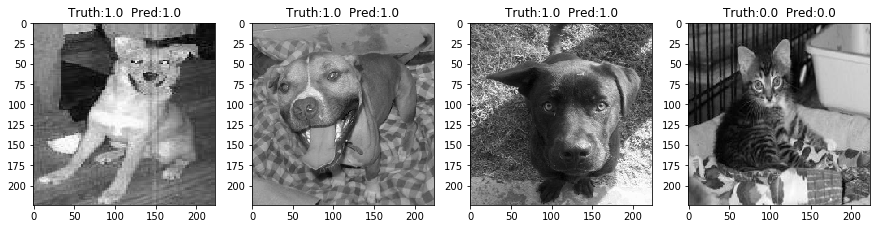

In [34]:
# display predictions
test_batches.batch_size = 4   # display 4 images each time.
images, labels = next(test_batches)
pred = model.predict(images).round()
plt.figure(figsize=(15,9))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i,:,:,0], cmap='gray')
    plt.title('Truth:' + str(labels[i,0]) + '  Pred:' + str(pred[i,0]))
    # plt.show()
print('Class labels: 1-dog, 0-cat')

In [48]:
# display the result on test batches
test_batches.batch_size = 20     # process all 20 images together
images, labels = next(test_batches) # take all 20 out
test_pred = model.predict(images).round()

from sklearn.metrics import accuracy_score, confusion_matrix

test_acc = accuracy_score(labels[:,0], test_pred[:,0].round(), normalize=True)
print('Accuracy on {} test samples: {:.1%}'.format(test_batches.batch_size, test_acc))

conf_mtx = confusion_matrix(labels[:,0], test_pred[:,0].round())
print('Confusion matrix on test samples:\n', conf_mtx)

Accuracy on 20 test samples: 100.0%
Confusion matrix on test samples:
 [[10  0]
 [ 0 10]]


In [49]:
model.save('dog_cat_CNN.model')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: dog_cat_CNN.model\assets


Get 10 sample of the batches